In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("kendall_corr.csv")
df_month

,June_7,April_2,April_5,May_5,June_5,November_7,June_3,November,November_4,April,...,December,July_5,March_4,November_8,May_2,March_6,March_2,February_3,February,September_2
0,-0.202334,0.098415,-0.308200,0.031694,-0.039586,-0.097144,-0.073610,-0.096409,0.882337,0.076585,...,0.727731,0.005846,0.601092,-0.066184,-0.631654,0.308417,-0.408106,-0.120828,-0.369995,0.311453
1,-0.202334,-0.218954,-0.398356,0.413521,-0.039586,-0.097144,-0.073610,-0.096409,0.882337,-0.017218,...,0.727731,0.005846,-0.087620,-0.066184,-1.040570,-0.857006,0.259438,-0.239634,-0.943234,0.311453
2,-0.168031,0.134482,-0.120259,0.100128,-0.172917,0.441251,0.070093,-0.110542,0.607091,-0.080567,...,0.159275,0.106080,0.295302,0.166858,-1.031658,-0.499999,-0.206351,-0.118580,-0.598703,0.424705
3,-0.113727,0.402854,0.106618,-0.065683,0.116948,0.698383,-0.177760,-0.034182,0.651124,0.054169,...,0.839901,-0.311289,-0.604674,0.472268,-0.992014,0.130924,0.130851,-0.063806,-0.530468,0.070501
4,-0.134278,0.002166,-0.136666,0.288075,-0.012212,0.154697,0.112119,-0.786923,0.627926,-0.484253,...,0.228937,0.073894,0.257782,0.186082,-1.232027,0.712118,-0.132162,-0.434999,-0.570082,0.338832
5,0.424991,0.367763,-0.157606,0.341029,-0.661289,0.426955,-0.225224,-0.145483,0.827519,-0.060473,...,0.569013,-0.398822,0.379577,0.484097,-0.911431,-0.807726,-0.142393,-0.271202,-0.514974,0.015511
6,-0.326554,0.144775,-0.071493,0.327735,0.129275,-0.346314,-0.120880,-0.668894,0.729266,-0.011018,...,0.178956,0.566129,0.197524,-0.002276,-1.109671,-0.462106,0.080712,-0.344043,-0.608095,0.089906
7,0.254591,0.094534,-0.386781,-0.050703,-0.380720,-0.562384,0.093717,-0.188236,0.818700,-0.178072,...,0.020534,0.050570,0.301809,0.421979,-0.820880,-0.198435,-0.477211,-0.123212,-0.588224,0.093052
8,-0.007211,0.546273,-0.190408,0.223293,0.106507,0.041883,-0.085340,-1.083098,0.675028,-0.224960,...,0.018540,0.195300,0.015493,0.305299,-1.041623,-0.731474,0.380916,-0.081132,-0.558588,0.607391
9,0.125501,0.332107,-0.531581,0.234343,0.214527,-0.095537,0.032189,-0.270716,0.662890,0.195880,...,0.104257,-0.053054,0.351490,0.048116,-0.963477,-0.985122,-0.149186,-0.375192,-0.844769,0.492687


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :10]
x_train = scaler.fit_transform(x_train)
x_train

array([[-3.88418762e-01,  2.67065412e-01, -7.57721103e-01,
        -3.88512138e-01, -5.64192617e-01,  1.15180376e-01,
        -4.65955616e-01,  6.06473267e-01,  1.10863665e+00,
         5.54702425e-01],
       [-3.88418762e-01, -8.23887258e-01, -1.06600190e+00,
         1.47422655e+00, -5.64192617e-01,  1.15180376e-01,
        -4.65955616e-01,  6.06473267e-01,  1.10863665e+00,
        -1.60330056e-02],
       [-2.42543001e-01,  3.91045161e-01, -1.15076444e-01,
        -5.46577685e-02, -9.49160023e-01,  1.40845350e+00,
         5.77683045e-01,  5.62874949e-01, -6.96974593e-01,
        -4.01472714e-01],
       [-1.16183757e-02,  1.31357284e+00,  6.60707012e-01,
        -8.63564367e-01, -1.12230114e-01,  2.02610969e+00,
        -1.22234260e+00,  7.98423723e-01, -4.08119991e-01,
         4.18316970e-01],
       [-9.90103033e-02, -6.37895011e-02, -1.71178913e-01,
         8.62238421e-01, -4.85154933e-01,  7.20126266e-01,
         8.82899087e-01, -1.52357563e+00, -5.60295588e-01,
        -2.

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :10]
x_test = scaler.fit_transform(x_test)
x_test

array([[-0.3533441 , -0.76058626,  0.027509  ,  0.97200241, -1.27583361,
        -0.51844231,  0.11296712, -0.03976428, -1.82156686,  0.20553811],
       [ 2.02601946, -1.63909757, -0.30373548, -0.26768388, -0.84670646,
         2.43599814,  1.32059392,  1.32761937,  0.90300556, -1.54224229],
       [-0.85008589, -0.86800887,  0.37161831, -0.26159471,  1.40867817,
        -0.01945758, -0.53404559, -1.16856006, -0.01323501, -0.57683171],
       [ 1.4903623 ,  0.2884215 ,  1.47045351,  0.94879558, -1.03241944,
        -0.61135938, -0.64148646, -0.40756564,  0.48183418,  0.77375079],
       [-1.64097501,  0.61334562, -0.40686495,  1.34863923, -1.13630909,
         0.3056321 , -0.14508841, -1.13401544,  0.80348091,  0.24649375],
       [ 0.9403823 ,  1.33831222,  0.50722272, -1.61434388,  1.83032761,
         0.09369978,  0.78191714,  0.24182537, -0.32287311, -0.43232116],
       [-0.55628001,  1.74608567, -0.59493842, -1.45332636,  0.28503552,
        -0.38654212,  1.48719609,  0.13386233

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 27}
Best Score: 0.3566888445596652
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 32}
Best Score: 0.26028266636014086
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 27}
Best Score: 0.38922633673601625
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 12}
Best Score: 0.4342006382042312
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 9}
Best Score: 0.15303619470205015


In [13]:
y_pred_list

[array([-0.44209304,  0.77576112, -0.21723135, -0.15735754, -0.0065877 ,
        -0.20721144, -0.30459086, -0.27985165,  0.62147351, -0.63673959,
        -0.45162177,  0.45066384,  0.02508528,  0.43475959,  0.20848572,
        -0.15998971]),
 array([-0.51703574,  0.50016344, -0.07044287, -0.30659275, -0.11536207,
        -0.06427583, -0.15325074,  0.08777087,  0.39853088, -0.44680953,
        -0.28120532,  0.47533609, -0.05720102,  0.52188322,  0.07489948,
        -0.13008383]),
 array([-0.49696294,  0.65585261, -0.20579748, -0.17074714,  0.00630043,
        -0.22562569, -0.14736672, -0.3471198 ,  0.76377878, -0.52586878,
        -0.44301998,  0.3696938 ,  0.05074632,  0.16670665,  0.05118542,
        -0.03671122]),
 array([ 0.04299074,  0.60239749, -0.04341487,  0.04956802,  0.06670233,
        -0.04552267, -0.45393661, -0.24380398,  0.50961145, -0.57769719,
        -0.28746148,  0.38559973,  0.09799328,  0.27188143,  0.23397865,
        -0.21146037]),
 array([ 0.03477263,  0.28765316

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.6920377500323659,
 0.5548943403735916,
 0.5610962025367293,
 0.7510949629938877,
 0.7572903185941463]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/uwind+vwind/10 predictors/kendall/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'uwind+vwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/uwind+vwind/10 predictors/kendall/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/uwind+vwind/10 predictors/kendall/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'uwind+vwind Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/uwind+vwind/10 predictors/kendall/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 27}
Best Score: 0.3566888445596652
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 32}
Best Score: 0.26028266636014086
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 27}
Best Score: 0.38922633673601625
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 12}
Best Score: 0.4342006382042312
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 9}
Best Score: 0.15303619470205015


In [21]:
y_pred_list_rf

[array([-0.44209304,  0.77576112, -0.21723135, -0.15735754, -0.0065877 ,
        -0.20721144, -0.30459086, -0.27985165,  0.62147351, -0.63673959,
        -0.45162177,  0.45066384,  0.02508528,  0.43475959,  0.20848572,
        -0.15998971]),
 array([-0.51703574,  0.50016344, -0.07044287, -0.30659275, -0.11536207,
        -0.06427583, -0.15325074,  0.08777087,  0.39853088, -0.44680953,
        -0.28120532,  0.47533609, -0.05720102,  0.52188322,  0.07489948,
        -0.13008383]),
 array([-0.49696294,  0.65585261, -0.20579748, -0.17074714,  0.00630043,
        -0.22562569, -0.14736672, -0.3471198 ,  0.76377878, -0.52586878,
        -0.44301998,  0.3696938 ,  0.05074632,  0.16670665,  0.05118542,
        -0.03671122]),
 array([ 0.04299074,  0.60239749, -0.04341487,  0.04956802,  0.06670233,
        -0.04552267, -0.45393661, -0.24380398,  0.50961145, -0.57769719,
        -0.28746148,  0.38559973,  0.09799328,  0.27188143,  0.23397865,
        -0.21146037]),
 array([ 0.03477263,  0.28765316

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.6920377500323659,
 0.5548943403735916,
 0.5610962025367293,
 0.7510949629938877,
 0.7572903185941463]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/uwind+vwind/10 predictors/kendall/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'uwind+vwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook
    
print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/uwind+vwind/10 predictors/kendall/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/uwind+vwind/10 predictors/kendall/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'uwind+vwind Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/uwind+vwind/10 predictors/kendall/comparison plots/randomforest


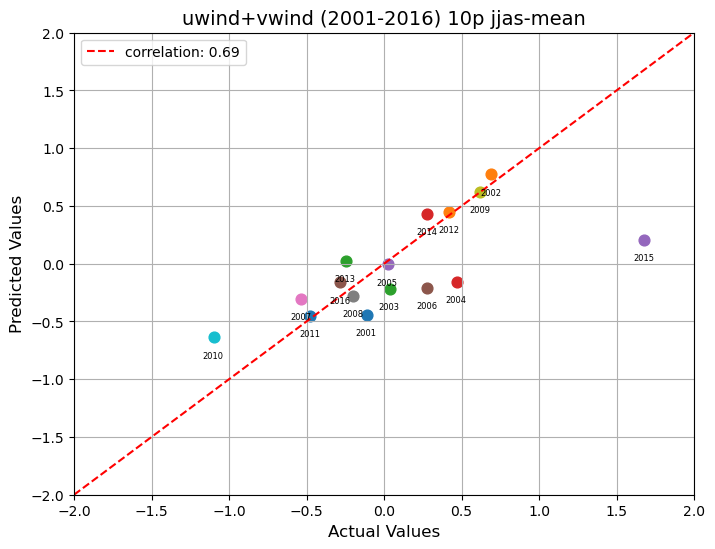

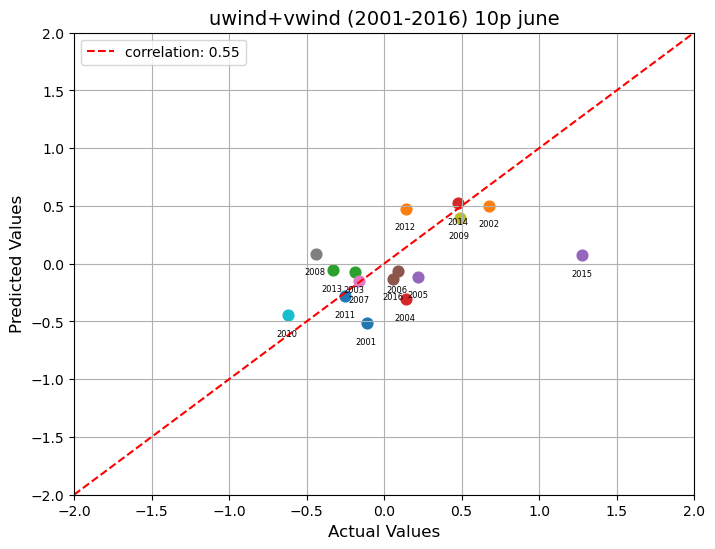

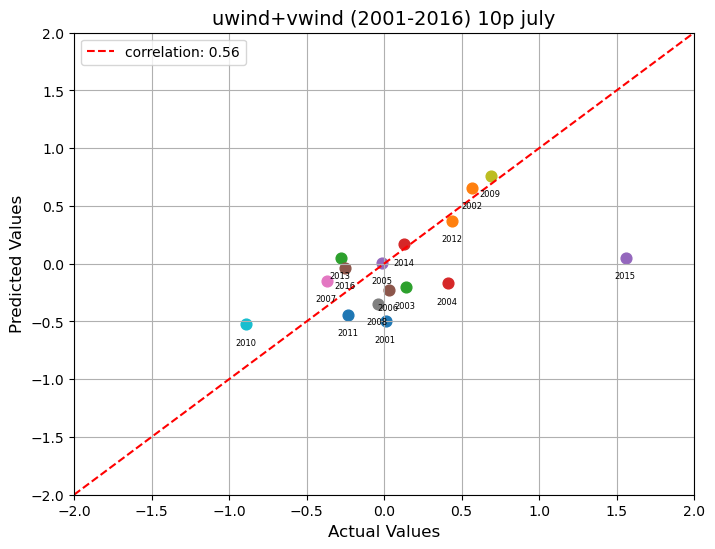

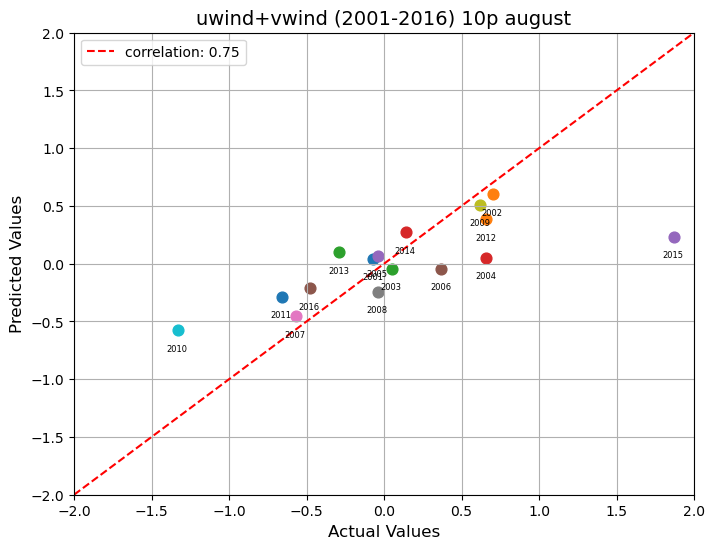

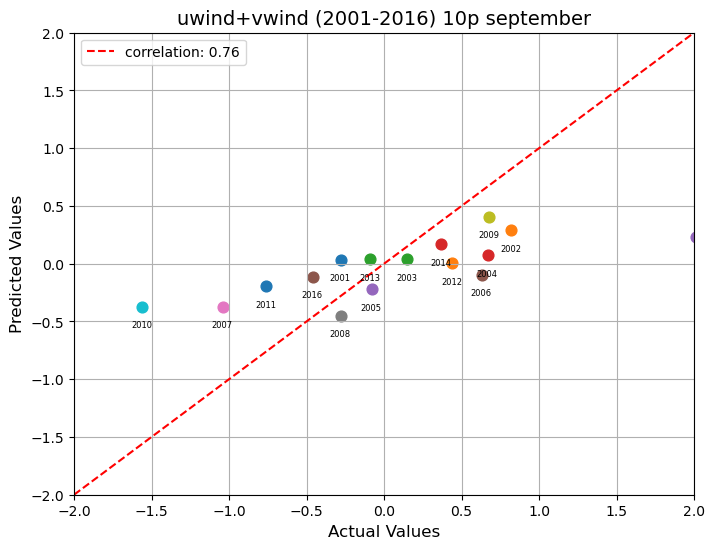

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=60)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'uwind+vwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show